# <center> Modelagem Guiada 2 - Regressão
## <center> Preços de casas na Russia
   

<center> Neste problema, iremos prever o preço de casas que foram vendidas na Rússia, a partir de algumas informações da própria casa e outras do município em que ela se localiza <p>
   
<center> <img src = "../0. MISC/kremlin.jpeg" width=1500>

As informações de compra e venda de casas ao longo dos últimos 100 anos foi contabilizada pelo banco **Sberbank**, o maior da Russia, e é o que usaremos para o nosso problema.

As bases de dados já estão separadas em treino e teste nos arquivos `sberbank_treino.csv` e `sberbank_teste.csv`.

Descrição das features na base:
- `id`: Registro numérico da venda
- `timestamp`: Data do registro da venda
- `full_sq`: Tamanho total do terreno, incluindo área externa
- `life_sq`: Tamanho total da casa
- `floor`: Andar do apartamento, quando imóvel em um prédio
- `max_floor`: Número máximo de andares do prédio, se o imóvel for um apartamento
- `material`: Material de construção do imóvel (código)
- `build_year`: Ano de construção
- `num_room`: Número de quartos
- `kitch_sq`: Tamanho da cozinha
- `state`: Estado do imóvel (código)
- `area_m`: Área total do município (em russo, raion)
- `sub_area`: Nome do distrito em que se encontra a casa
- `healthcare_centers_raion`: Hospitais no município

- `university_top_20_raion`: # de universidades dentre as top 20 do ranking Federal no município
- `shopping_centers_raion`: # de Shoppping Centers no município
- `oil_chemistry_raion`: Presença de empresas emissoras de poluentes no município
- `nuclear_reactor_raion`: Presença de reatores nucleares no município
- `full_all`: População total do município
- `young_all`: População jovem do município
- `work_all`: População trabalhadora do município
- `ekder_all`: População idosa do município
- `kremlin_km`: Distância em km ao Kremlin
- `big_road1_km`: Distância em km da primeira maior rodovia mais próxima
- `railroad_km`: Distância em km até a linha ferroviária

- `zd_vokzaly_avto_km`: Distância em km de carro (avto) até a estação de trem mais próxima
- `metro_km_avto`: Distância em km da estação de metrô mais próxima de carro
- `metro_km_walk`: Distância em km da estação de metrô mais próxima a pé
- `radiation_km`: Distância até o aterro nuclear mais próximo
- `price_doc`: Preço da casa em Rublos. **É a nossa variável resposta!**

Para este problema, filtramos de um dataset com bem mais features (cerca de 280), mas os dados completos podem ser acessados da página do desafio no **<a href="https://www.kaggle.com/c/sberbank-russian-housing-market">Kaggle</a></p>**:

O primeiro passo é carregar os nossos dados, localizados na pasta **1. Dados**

In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Carregando os dados
dados_treino = pd.read_csv('../1. Dados/sberbank_treino.csv',index_col=0).reset_index().drop('index',axis=1)
dados_teste = pd.read_csv('../1. Dados/sberbank_teste.csv',index_col=0).reset_index().drop('index',axis=1)

dados_treino.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,oil_chemistry_raion,nuclear_reactor_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Bibirevo,6.407578e+06,155572,1,0,16,no,no,86206,21154,98207,36211,15.156211,1.422391,1.305159,14.231961,1.131260,1.131260,1.210027,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Nagatinskij Zaton,9.589337e+06,115352,1,0,3,no,no,76284,15727,70194,29431,8.698054,2.887377,0.694536,9.242586,0.647337,0.635053,2.724295,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Tekstil'shhiki,4.808270e+06,101708,1,0,0,no,no,101982,13028,63388,25292,9.067885,0.647250,0.700691,9.540544,1.637996,1.445960,0.772216,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Mitino,1.258354e+07,178473,1,0,11,no,no,21155,28563,120381,29529,19.487005,2.677824,1.999265,17.478380,0.984537,0.963802,6.348716,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Basmannoe,8.398461e+06,108171,4,2,10,no,no,28179,13368,68043,26760,2.578671,1.721834,0.084113,1.595898,0.876620,0.688859,1.638318,16331452


### É um problema completo de ciência de dados, então vamos abordá-lo em etapas!:

- [1. Entendimento dos Dados](#1)
    - [1.1 Estatísticas gerais da base](#1.1)
    - [1.2 Tipos de dados](#1.2)
- [2. EDA, e porque ele é importante](#2)
    - [2.1 EDA da variável resposta](#2.1)
    - [2.2 EDA de variáveis numéricas](#2.2)
    - [2.3 EDA de variáveis categóricas](#2.2)
- [3. Preprocessamento dos Dados](#3)
    - [3.1 Tratamento de Missings](#3.1)
    - [3.2 Identificação de Outliers](#3.2)
    - [3.3 Tratamento de variáveis categóricas](#3.3)
- [4. Modelagem](#4)
    - [4.1 Escolha de métrica](#4.1)
    - [4.2 Treinamento e avaliação do modelo](#4.2)
    - [4.3 Feature Engineering](#4.3)
- [5. Conclusões](#5)
    - [5.1 Resumo do que fizemos](#5.1)
    - [5.2 O que poderíamos melhorar ou explorar mais?](#5.2)
    - [5.3 Dúvidas? Novas ideias?](#5.2)    

 <a name='1'></a>
 ## 1. Entendimento dos Dados
 
 Mesmo em situações onde temos bases e dados comportados, é sempre bom olhar características gerais da base que estamos trabalhando, como tamanho, número de linhas e os tipos envolvidos

 <a name='1.1'></a>
 ### 1.1 Estatísticas Gerais da Base

In [2]:
# Verificando tipos e dados
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23070 non-null  int64  
 1   timestamp                 23070 non-null  object 
 2   full_sq                   23070 non-null  int64  
 3   life_sq                   16687 non-null  float64
 4   floor                     22903 non-null  float64
 5   max_floor                 13498 non-null  float64
 6   material                  13498 non-null  float64
 7   build_year                9465 non-null   float64
 8   num_room                  13498 non-null  float64
 9   kitch_sq                  13498 non-null  float64
 10  state                     9511 non-null   float64
 11  sub_area                  23070 non-null  object 
 12  area_m                    23070 non-null  float64
 13  raion_popul               23070 non-null  int64  
 14  health

 <a name='1.2'></a>
 ### 1.2 Tipos de Dados
 
 Podemos separar features numéricas e categóricas usando o método `.select_dtypes()`:

In [3]:
# Desconsiderando features que não irão nos ajudar!
features_nao_importantes = ['id','timestamp']
dados_filtrados = dados_treino.drop(features_nao_importantes,axis=1) # id e timestamp são apenas identificadores das linhas
dados_filtrados_teste = dados_teste.drop(features_nao_importantes,axis=1) # id e timestamp são apenas identificadores das linhas

# Separando features numéricas

dados_num = dados_filtrados.select_dtypes(exclude='object')
dados_cat = dados_filtrados.select_dtypes(include='object')

# Incluindo a target nos dados categóricos (mesmo ela sendo numérica!) para facilitar análises
dados_cat['price_doc'] = dados_num['price_doc']

Podemos agora ver os dados que 'sobraram' em cada um dos Datasets

In [4]:
dados_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   full_sq                   23070 non-null  int64  
 1   life_sq                   16687 non-null  float64
 2   floor                     22903 non-null  float64
 3   max_floor                 13498 non-null  float64
 4   material                  13498 non-null  float64
 5   build_year                9465 non-null   float64
 6   num_room                  13498 non-null  float64
 7   kitch_sq                  13498 non-null  float64
 8   state                     9511 non-null   float64
 9   area_m                    23070 non-null  float64
 10  raion_popul               23070 non-null  int64  
 11  healthcare_centers_raion  23070 non-null  int64  
 12  university_top_20_raion   23070 non-null  int64  
 13  shopping_centers_raion    23070 non-null  int64  
 14  full_a

In [5]:
dados_cat.dtypes

sub_area                 object
oil_chemistry_raion      object
nuclear_reactor_raion    object
price_doc                 int64
dtype: object

 <a name='1'></a>
 ## 2. EDA, e porque ele é importante
 
 Por mais que às vezes temos vontade de partir para a modelagem, uma Análise Exploratória de qualidade pode ser o diferencial para ter melhores performances no modelo e, principalmente, evitar retrabalho!

 <a name='2.1'></a>
 ### 2.1 EDA da variável resposta

A forma mais fácil de analisar o problema que estamos tratando é justamente o de avaliar como é a nossa variável resposta

In [6]:
var_resposta = dados_treino.price_doc
var_resposta

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
23065     1000000
23066     9500000
23067    12000000
23068    25000000
23069    13500000
Name: price_doc, Length: 23070, dtype: int64

Vamos analisar a distribuição da variável resposta usando um `distplot`, do Seaborn. <p>
Ele é muito útil para vermos tanto o histograma quanto uma função suavizada (kde) que contorna os dados

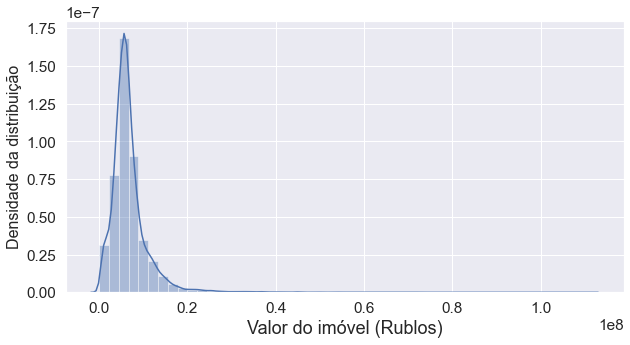

Média de preço das casas no conjunto de treino:
6914747.217902037


In [7]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.4)
sns.distplot(dados_filtrados.price_doc,kde=True) #kde=True contorna uma linha aos dados
plt.xlabel('Valor do imóvel (Rublos)', fontsize=18)
plt.ylabel('Densidade da distribuição', fontsize=16)
plt.show()
print('Média de preço das casas no conjunto de treino:')
print(dados_filtrados.price_doc.mean())

Apenas como ordem de grandeza, 100 Rublos ~ `R$` 7,14, então em média uma casa comprada na Russia nesse período custou cerca de `R$` 493 mil

Nossa distribuição é bastante concentrada em ~7.000.000 Rublos, mas podemos contornar essa concentração aplicando o **logaritmo** sobre essa distribuição <p>

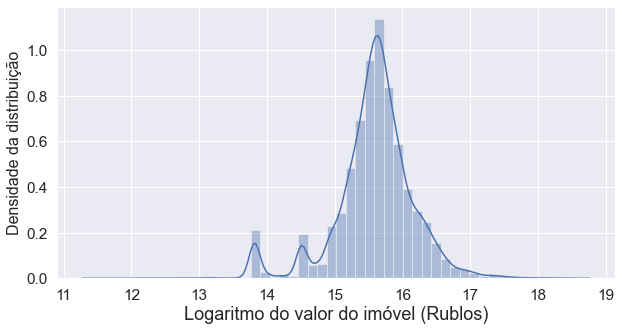

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(dados_filtrados.price_doc),kde=True) #kde=True contorna uma linha aos dados
plt.xlabel('Logaritmo do valor do imóvel (Rublos)', fontsize=18)
plt.ylabel('Densidade da distribuição', fontsize=16)
plt.show()

 <a name='2.2'></a>
 ### 2.1 EDA de variáveis numéricas

Para analisar as variáveis numéricas, vamos apenas filtrar dados nos tipos inteiro e float, como fizemos antes <p>
Desta forma, podemos usar métodos muito úteis do Pandas, como o `.describe()`

In [9]:
dados_num.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc
count,23070.000000,16687.000000,22903.000000,13498.000000,13498.000000,9.465000e+03,13498.000000,13498.000000,9511.000000,2.307000e+04,23070.000000,23070.000000,23070.000000,23070.000000,2.307000e+04,23070.00000,23070.000000,23070.000000,23070.000000,23070.000000,23070.000000,23070.000000,23070.000000,23045.000000,23070.000000,2.307000e+04
mean,54.444560,34.552346,7.856656,12.698770,1.772929,3.978275e+03,1.887243,5.911542,1.992850,1.885469e+07,79332.940919,1.236194,0.136281,4.060468,1.388515e+05,10584.85700,50666.675986,18081.407932,16.516726,1.912154,1.971653,17.892667,3.850460,3.705088,4.643143,6.914747e+06
std,41.771365,61.271959,5.379163,7.045293,1.454326,2.060908e+05,0.825359,34.572477,0.926166,2.159834e+07,58296.644519,1.473537,0.445063,4.821890,2.702791e+05,8281.31345,37719.657844,13286.930188,8.526531,1.304820,2.028273,10.444900,5.890562,5.842068,5.676971,4.637578e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,2.546000e+03,365.00000,1633.000000,548.000000,0.072897,0.000364,0.002299,0.136715,0.007217,0.007217,0.004663,1.000000e+05
25%,39.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,19940.000000,0.000000,0.000000,0.000000,2.115500e+04,3459.00000,13331.000000,3150.000000,10.749628,0.798229,0.682915,10.395907,1.036568,0.989255,1.287072,4.600000e+06
50%,50.000000,30.000000,7.000000,14.000000,1.000000,1.980000e+03,2.000000,6.000000,2.000000,1.127507e+07,78810.000000,1.000000,0.000000,3.000000,8.336900e+04,10412.00000,51138.000000,18558.000000,15.526911,1.744856,1.266142,15.601020,1.925067,1.791193,2.736741,6.099620e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.006000e+03,2.000000,8.000000,3.000000,2.149409e+07,116742.000000,2.000000,0.000000,5.000000,1.251110e+05,14588.00000,75334.000000,27346.000000,21.528658,2.808628,2.566044,24.613188,3.791326,3.776836,5.368975,8.000000e+06
max,5326.000000,7478.000000,44.000000,117.000000,6.000000,2.005201e+07,10.000000,2014.000000,33.000000,2.060718e+08,247469.000000,6.000000,3.000000,23.000000,1.716730e+06,40692.00000,161290.000000,57086.000000,70.738769,6.995416,17.387119,91.215063,74.905763,59.267984,53.890157,1.111111e+08


In [10]:
descr = dados_num.describe().T #Describe, transposto para facilitar a visualização
descr

,count,mean,std,min,25%,50%,75%,max
full_sq,23070.0,5.444456e+01,4.177137e+01,0.000000e+00,3.900000e+01,5.000000e+01,6.300000e+01,5.326000e+03
life_sq,16687.0,3.455235e+01,6.127196e+01,0.000000e+00,2.000000e+01,3.000000e+01,4.300000e+01,7.478000e+03
floor,22903.0,7.856656e+00,5.379163e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,4.400000e+01
max_floor,13498.0,1.269877e+01,7.045293e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.700000e+01,1.170000e+02
material,13498.0,1.772929e+00,1.454326e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
build_year,9465.0,3.978275e+03,2.060908e+05,0.000000e+00,1.967000e+03,1.980000e+03,2.006000e+03,2.005201e+07
num_room,13498.0,1.887243e+00,8.253586e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01
kitch_sq,13498.0,5.911542e+00,3.457248e+01,0.000000e+00,1.000000e+00,6.000000e+00,8.000000e+00,2.014000e+03
state,9511.0,1.992850e+00,9.261656e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.300000e+01
area_m,23070.0,1.885469e+07,2.159834e+07,2.081628e+06,7.307411e+06,1.127507e+07,2.149409e+07,2.060718e+08


Outra forma muito útil de analisar muitas features de uma vez é usando o método **.hist()** do Dataframe

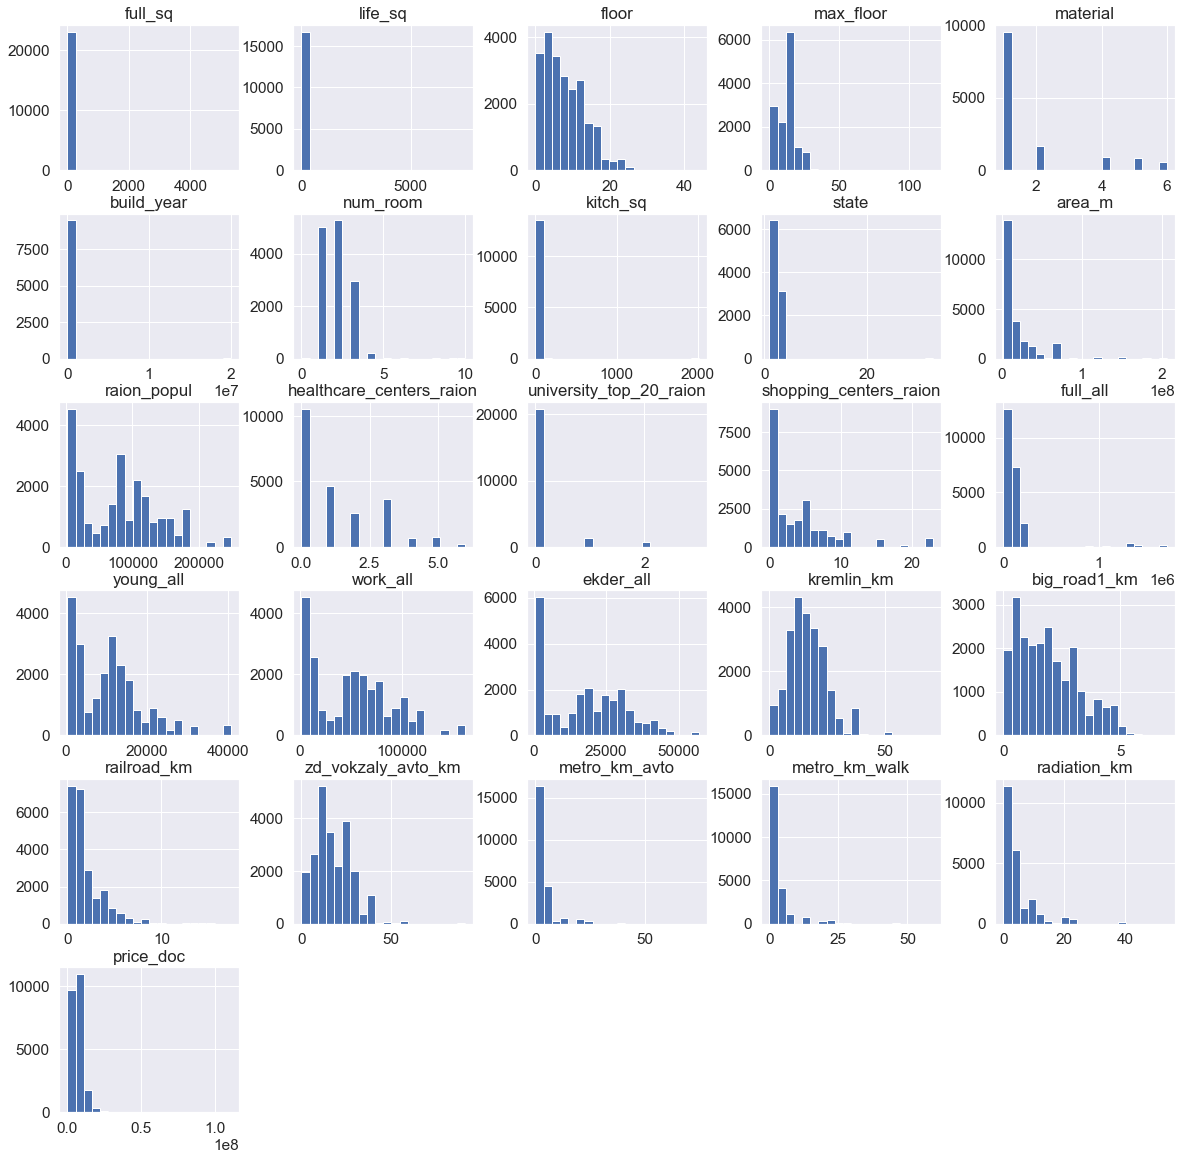

In [11]:
# Distribuição usando hist() para ver o histograma de todas as variáveis ao mesmo tempo
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
dados_num.hist(ax=ax,bins=20)
plt.show()

Com esses histogramas, conseguimos ter ideia das distribuições das variáveis todas de uma vez. Temos pontos importantes para concluir destas visualizações??

Mas nosso foco principal é a variável resposta, então precisamos entender como cada variável se correlaciona com a resposta, até mesmo para confirmar ou não hipóteses que temos sobre os dados. Para isso, podemos usar a matriz de correlações de Pearson do DataFrame, pelo método `.corr()`

In [12]:
dados_num.corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc
full_sq,1.000000,0.114773,0.080158,0.073709,0.027079,-0.008434,0.716315,0.006518,-0.095889,0.055979,-0.037891,-0.010661,0.038830,0.001539,0.021402,-0.025723,-0.037313,-0.044289,0.035296,0.010154,0.058970,0.042830,0.049619,0.040235,0.043193,0.304031
life_sq,0.114773,1.000000,0.040069,0.033635,0.004848,-0.002444,0.155610,-0.001332,-0.050632,0.059244,-0.063108,-0.032039,0.017185,-0.012684,-0.020109,-0.052497,-0.062714,-0.064581,0.042446,0.018129,0.051171,0.049987,0.030100,0.029216,0.047246,0.137684
floor,0.080158,0.040069,1.000000,0.415492,-0.024852,0.001488,-0.006588,-0.017697,-0.130426,-0.029023,-0.051157,-0.077593,0.009751,0.014850,-0.025760,-0.020807,-0.044935,-0.083915,0.032784,0.015307,0.014129,0.047154,-0.085052,-0.091814,-0.028464,0.120372
max_floor,0.073709,0.033635,0.415492,1.000000,0.032661,-0.000597,-0.018468,0.006246,-0.090107,-0.119704,-0.022404,-0.068213,0.020826,0.028427,0.000285,0.006909,-0.017228,-0.053726,-0.016468,0.014067,-0.038528,0.012513,-0.133628,-0.143893,-0.063560,0.060897
material,0.027079,0.004848,-0.024852,0.032661,1.000000,-0.005895,-0.011024,0.038868,-0.002379,0.003362,-0.029247,0.019234,0.032929,-0.057174,0.023694,-0.039743,-0.037040,0.001526,-0.060703,-0.045577,0.011446,-0.065764,0.020676,0.020430,-0.014750,0.062296
build_year,-0.008434,-0.002444,0.001488,-0.000597,-0.005895,1.000000,-0.011280,0.000539,0.390072,-0.005901,0.001919,0.010387,-0.003319,0.003121,-0.000863,0.000372,0.001945,0.002648,-0.008207,0.000811,0.005642,-0.006468,-0.004805,-0.004922,-0.005743,0.002958
num_room,0.716315,0.155610,-0.006588,-0.018468,-0.011024,-0.011280,1.000000,0.010828,0.089307,-0.037041,0.083803,0.074076,0.037343,0.058498,0.013774,0.077574,0.081131,0.089204,-0.054976,-0.016585,-0.025076,-0.064642,-0.012490,-0.020598,-0.023563,0.487744
kitch_sq,0.006518,-0.001332,-0.017697,0.006246,0.038868,0.000539,0.010828,1.000000,0.044953,-0.020271,0.035100,0.029544,-0.006543,0.003469,0.010799,0.031398,0.034867,0.035530,-0.011229,-0.009403,-0.013325,-0.021452,-0.004011,-0.003743,-0.013899,0.016056
state,-0.095889,-0.050632,-0.130426,-0.090107,-0.002379,0.390072,0.089307,0.044953,1.000000,-0.295539,0.410654,0.262762,-0.023998,0.125311,0.122962,0.358732,0.407933,0.415717,-0.242141,-0.104301,-0.197420,-0.300167,-0.165545,-0.170502,-0.237117,0.143746
area_m,0.055979,0.059244,-0.029023,-0.119704,0.003362,-0.005901,-0.037041,-0.020271,-0.295539,1.000000,-0.429347,-0.343359,-0.155724,-0.314103,-0.182418,-0.381726,-0.422405,-0.446705,0.555734,0.020351,0.496818,0.596373,0.582303,0.592897,0.522500,-0.171224


Apesar de útil, a matriz de correlações não nos dá uma visualização muito boa. Seria muito mais útil se olhássemos apenas para a correlação das variáveis com a variável resposta

In [13]:
# Filtrando apenas a coluna com as correlações entre as variáveis numéricas e a variável resposta
dados_num.corr()['price_doc']

full_sq                     0.304031
life_sq                     0.137684
floor                       0.120372
max_floor                   0.060897
material                    0.062296
build_year                  0.002958
num_room                    0.487744
kitch_sq                    0.016056
state                       0.143746
area_m                     -0.171224
raion_popul                 0.164841
healthcare_centers_raion    0.199954
university_top_20_raion     0.165496
shopping_centers_raion      0.153682
full_all                    0.029590
young_all                   0.150310
work_all                    0.156600
ekder_all                   0.184996
kremlin_km                 -0.279403
big_road1_km               -0.103832
railroad_km                -0.100157
zd_vokzaly_avto_km         -0.285647
metro_km_avto              -0.178300
metro_km_walk              -0.182645
radiation_km               -0.194374
price_doc                   1.000000
Name: price_doc, dtype: float64

Para ser mais útil e fácil, podemos ordenar estes valores

In [71]:
dados_num.corr()['price_doc'].sort_values(ascending=False)

price_doc                   1.000000
num_room                    0.372569
full_sq                     0.304031
healthcare_centers_raion    0.199954
ekder_all                   0.184996
university_top_20_raion     0.165496
raion_popul                 0.164841
work_all                    0.156600
shopping_centers_raion      0.153682
young_all                   0.150310
life_sq                     0.124849
floor                       0.120274
state                       0.095382
material                    0.078180
max_floor                   0.035796
full_all                    0.029590
kitch_sq                    0.012435
build_year                  0.003011
railroad_km                -0.100157
big_road1_km               -0.103832
area_m                     -0.171224
metro_km_avto              -0.178300
metro_km_walk              -0.182613
radiation_km               -0.194374
kremlin_km                 -0.279403
zd_vokzaly_avto_km         -0.285647
Name: price_doc, dtype: float64

Mesmo com poucos dados, pode ser difícil tirar conclusões simples entre as features; para isso, podemos usar o **Heatmap**, do Seaborn, para dar cores à nossa matriz de correlação

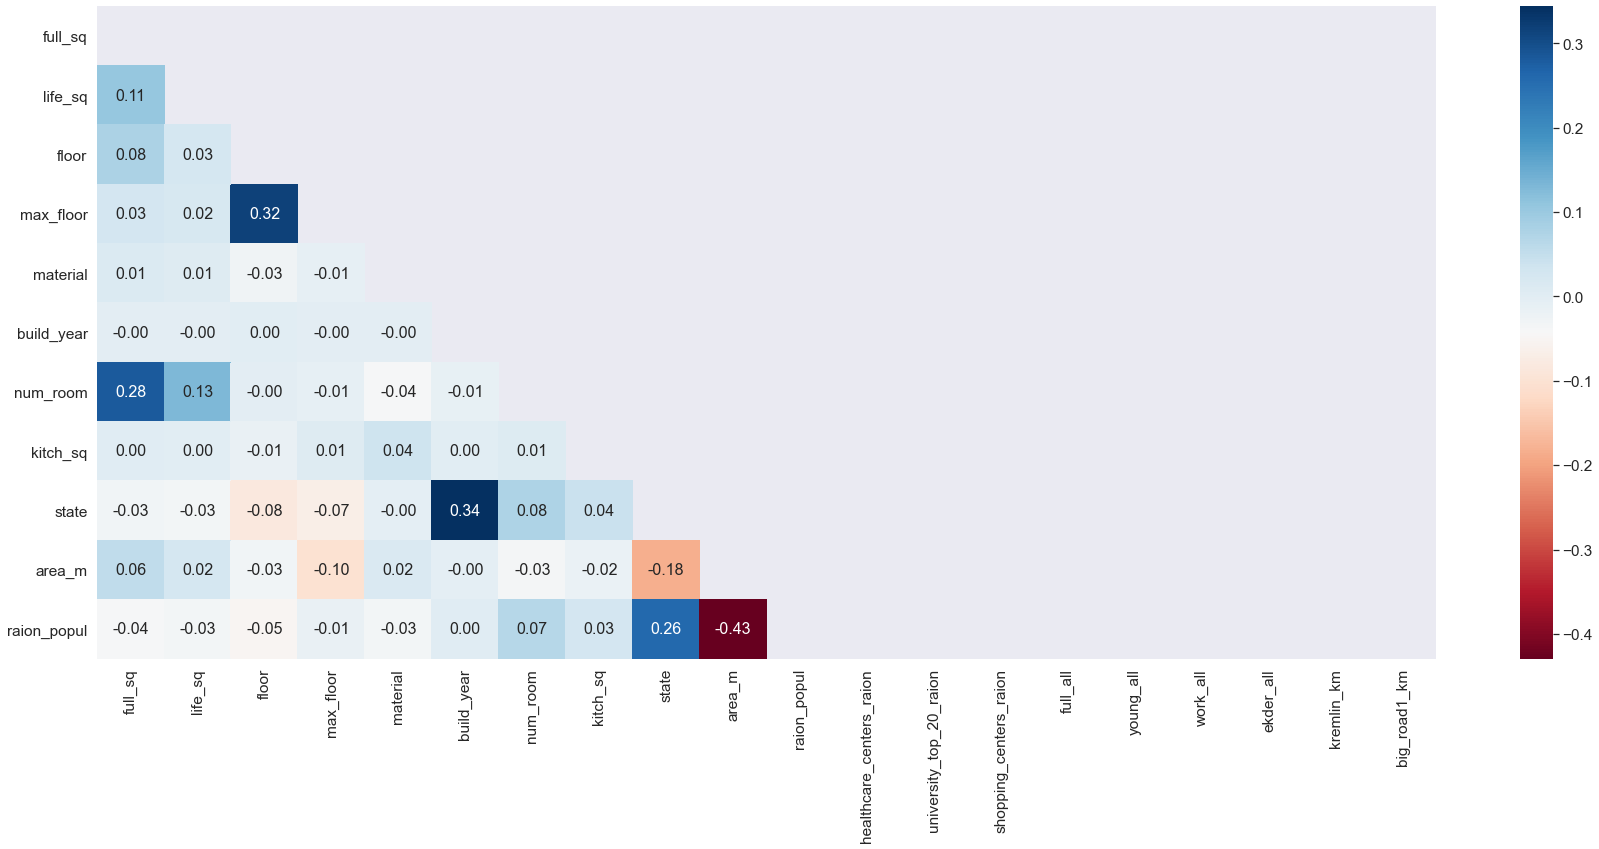

In [77]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
#sns.set_context(font_scale=0.5)
plt.figure(figsize=(30,12))
sns.heatmap(dados_num.corr().iloc[:11,:20], # Dados de origem, a matriz de correlações de Pearson
            annot=True, #Anotando os valores nas caixinhas do Heatmap
            fmt='.2f', # Os números anotados até a segunda casa decimal
            annot_kws={'fontsize':16},
            cmap='RdBu', # Paleta de cores do vermelho (menor) para o azul (maior)
            mask=np.triu(np.ones_like(dados_num.corr().iloc[:11,:20])) # Máscara para manter apenas um dos lados da diagonal
           )
plt.show()

#### <center>Quais correlações podemos ver entre as features?

<a name='2.3'></a>
 ### 2.3 EDA das variáveis categóricas

Para analisar as variáveis numéricas, vamos apenas filtrar dados nos tipos **não** inteiro e float, como fizemos antes <p>
Assim como para variáveis numéricas, o método `.describe()` também funciona para variáveis categóricas

In [16]:
# Usando o método describe
dados_cat.describe(include=['object'])

,sub_area,oil_chemistry_raion,nuclear_reactor_raion
count,23070,23070,23070
unique,146,2,2
top,Poselenie Sosenskoe,no,no
freq,1607,22872,22503


É interessante também analisarmos a distribuição da variável resposta em função de cada categoria da variável categórica. Para esta análise, podemos usar o **Boxplot**, do Seaborn

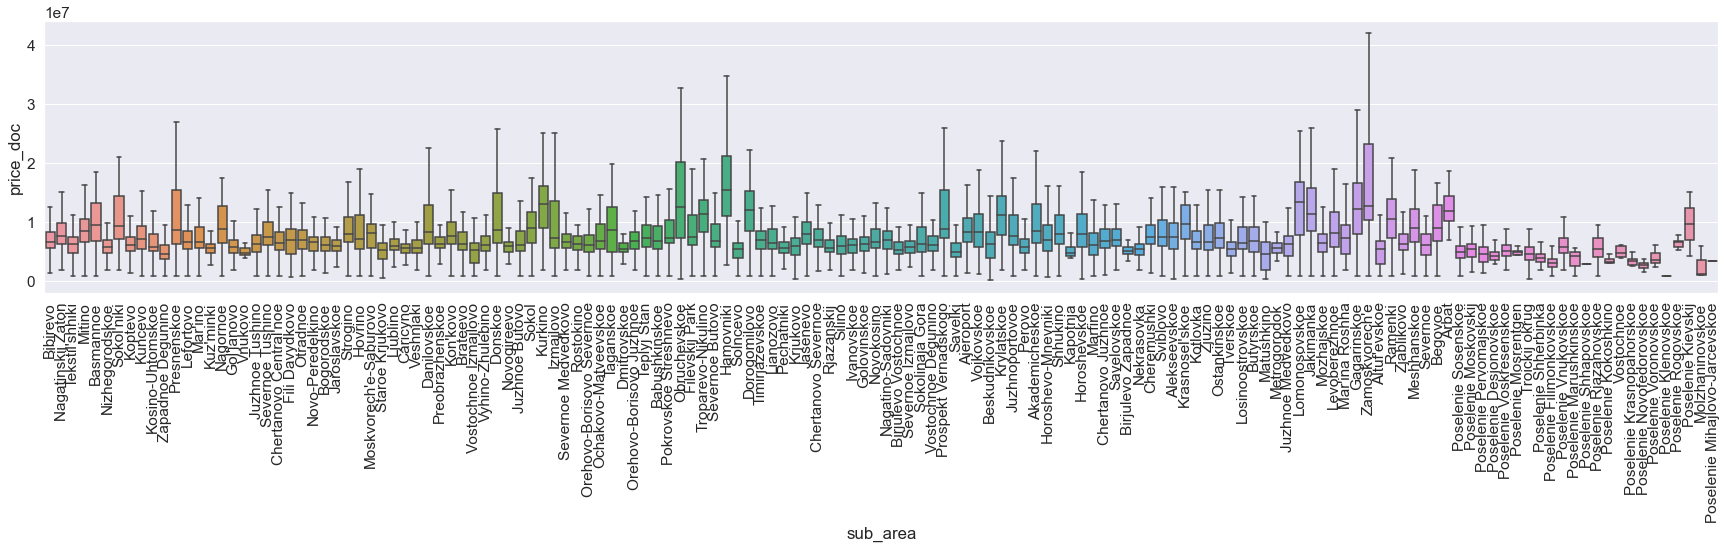

In [17]:
# Apolicando Boxplot sobre a variável 'sub_area'
sns.set_context(font_scale=1.4)
plt.figure(figsize=(30,5))
sns.boxplot(data=dados_cat,x='sub_area',y='price_doc', showfliers=False)
plt.xticks(rotation=90)
plt.show()

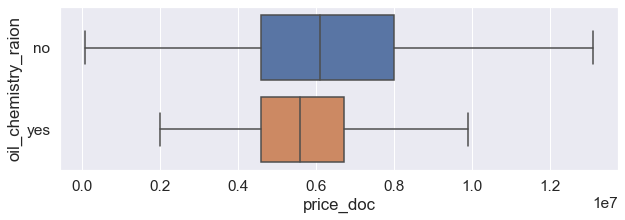

In [18]:
# Apolicando Boxplot sobre a variável 'oil_chemistry_raion'
sns.set(font_scale = 1.4)
plt.figure(figsize=(10,3))
sns.boxplot(data=dados_cat,y='oil_chemistry_raion',x='price_doc',showfliers=False)
plt.show()

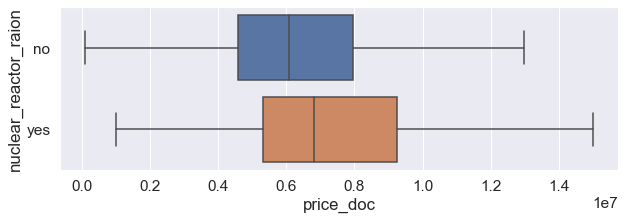

In [19]:
# Apolicando Boxplot sobre a variável 'nuclear_reactor_raion'
sns.set(font_scale = 1.4)
plt.figure(figsize=(10,3))
sns.boxplot(data=dados_cat,y='nuclear_reactor_raion',x='price_doc',showfliers=False)
plt.show()

<center> Podemos tirar alguma conclusão sobre estas relações com o preço do imóvel?

 <a name='3'></a>
 ## 3. Preprocessamento dos Dados
 
Modelos só aceitam dados preenchidos e corretos, então a limpeza e tratamento dos dados é essencial para que nosso modelo performe bem!

<a name='3.1'></a>
 ### 3.1 Tratamento de missings

Temos várias formas tratar dados faltantes, sendo as principais a **inputação** de dados ou o **descarte** <p>
Para decidir qual seria melhor, temos primeiro que avaliar o volume de dados faltantes <p>
    
Podemos fazer isso de forma bem fácil usando uma sumarização do Pandas, usando o método `.isna()`

In [20]:
missings = dados_treino.isna().mean()*100 # Fazendo a média e multiplicando por 100 para interpretar como percentual
missings.sort_values(ascending=False, inplace=True) # Ordenando os dados de forma decrescenmte
#*100 para transformar em percentual

missings[:10] # Só as 10 primeiras colunas

build_year       58.972692
state            58.773299
max_floor        41.491114
material         41.491114
num_room         41.491114
kitch_sq         41.491114
life_sq          27.667967
floor             0.723884
metro_km_walk     0.108366
price_doc         0.000000
dtype: float64

Como podemos ver, temos duas colunas com mais de **50%** de missings (build_year e state) e quatro com ~37% de missings. <p>
Agora a pergunta é: O que fazer com essas colunas? **Preencher** os missings ou **Descartar** as linhas com missing? Deveríamos ter uma forma mais prática de ter uma ideia se a variável com missings é importante o bastante para valer o trabalho de preenchê-la.

Nós já temos nossa tabela de correlações, como vimos antes

In [21]:
correlacoes = dados_num.corr()['price_doc'].sort_values(ascending=False)
correlacoes

price_doc                   1.000000
num_room                    0.487744
full_sq                     0.304031
healthcare_centers_raion    0.199954
ekder_all                   0.184996
university_top_20_raion     0.165496
raion_popul                 0.164841
work_all                    0.156600
shopping_centers_raion      0.153682
young_all                   0.150310
state                       0.143746
life_sq                     0.137684
floor                       0.120372
material                    0.062296
max_floor                   0.060897
full_all                    0.029590
kitch_sq                    0.016056
build_year                  0.002958
railroad_km                -0.100157
big_road1_km               -0.103832
area_m                     -0.171224
metro_km_avto              -0.178300
metro_km_walk              -0.182645
radiation_km               -0.194374
kremlin_km                 -0.279403
zd_vokzaly_avto_km         -0.285647
Name: price_doc, dtype: float64

Podemos agora ver ao mesmo tempo a correlação e o % de missings, para decidir se temos argumentos o suficiente para preencher as principais 5 colunas

In [22]:
# Filtrando apenas as 6 colunas com mais missings
colunas_para_decidir = missings.index[:5] 

# Observando as correlações com a variável resposta destas features
correlacoes.loc[colunas_para_decidir]

build_year    0.002958
state         0.143746
max_floor     0.060897
material      0.062296
num_room      0.487744
Name: price_doc, dtype: float64

Quais features parecem ter bastante valor?

<center> Fizemos a análise de missings usando basicamente funções do Pandas, mas há módulos próprios para isso, como o <b>MissingNo!!! </b>
    
<img src = "../0. MISC/missingno.jpg" width=600>

Caso não tenha essa lib, descomente a linha abaixo e rode a célula!!


In [23]:
#!pip install missingno

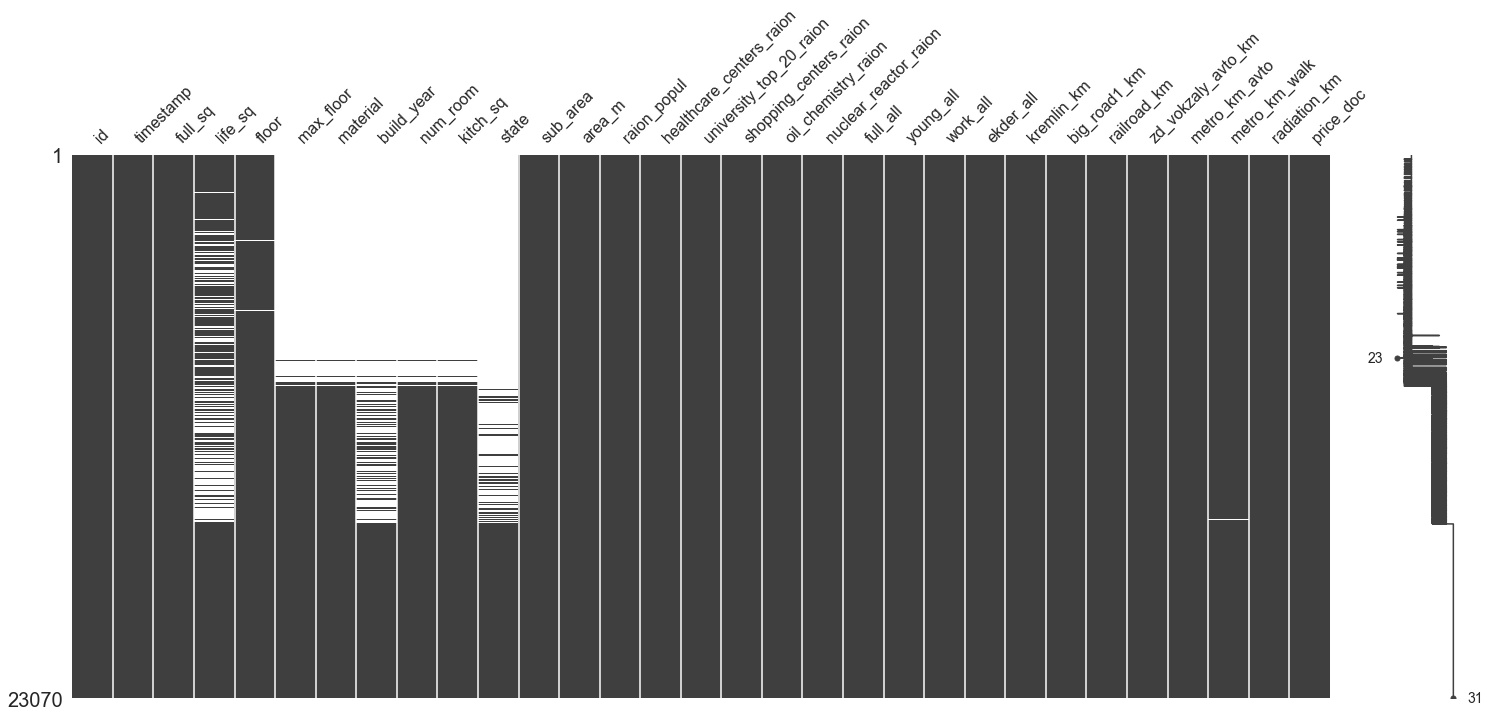

In [24]:
import missingno as msno
msno.matrix(dados_treino)
plt.show()

Nessa representação, fica bem fácil entender as variáveis com missings, mas agora o que fazer com elas?

Caso optemos por preencher os missings, há algumas formas padrão de se fazer isso

* Preenchimento com zeros
* Preenchimento com médias
* Preenchimento via regressão

Para este problema, iremos com as **medianas** usando o método `.fillna()`, do Pandas:

In [26]:
dados_full = dados_filtrados.fillna(dados_filtrados.median())

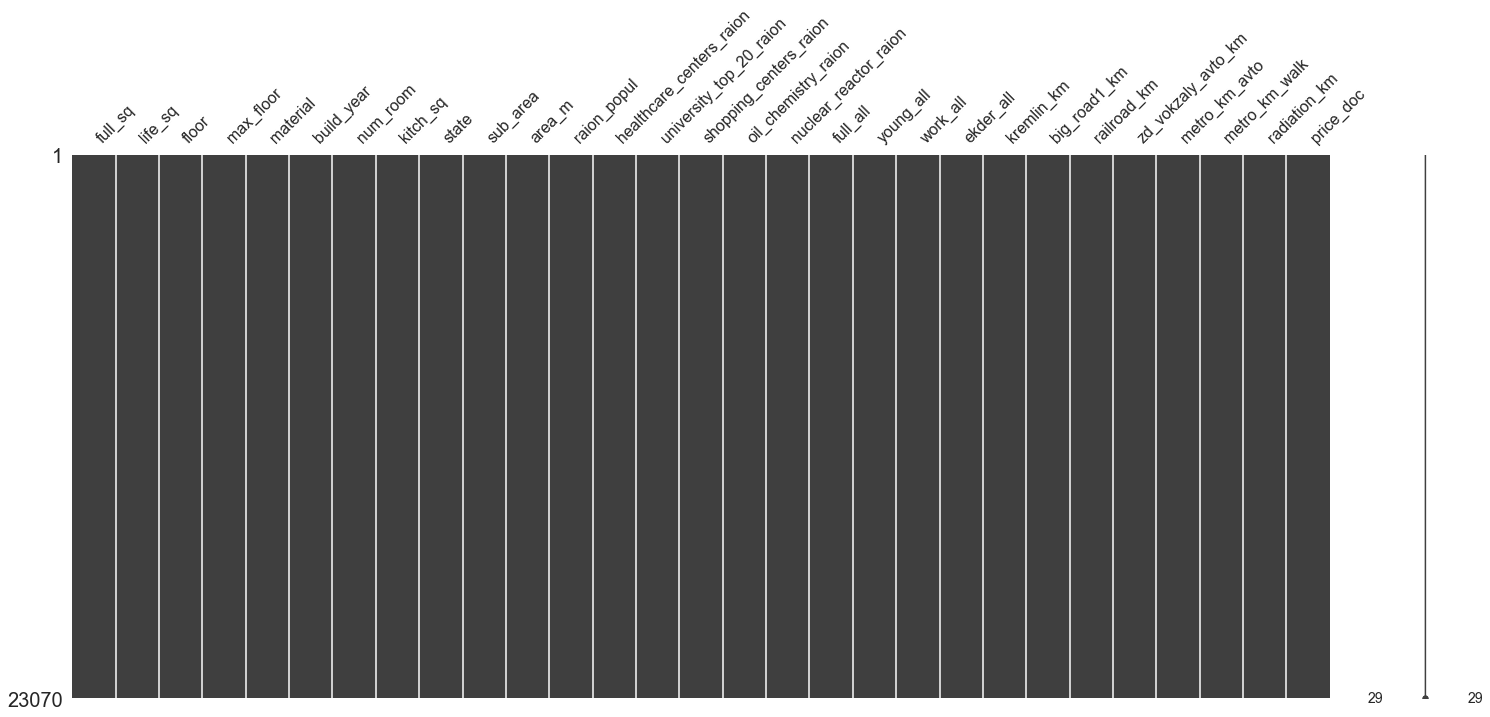

In [27]:
# Avaliando novamente pelo MissingNo
msno.matrix(dados_full)
plt.show()

<center> Agora não há mais missings na base!

<a name='3.2'></a>
 ### 3.2 Tratamento de outliers

Agora que temos os dados preenchidos, vamos confirmar a **consistência** dos dados, i.e., tentar nos precaver de dados preenchidos incorretamente que podem enviesar nossos modelos

Para isso, vamos olhar novamente nosso conjunto de histogramas das variáveis numéricas

In [28]:
dados_num = dados_full.select_dtypes(exclude='object')

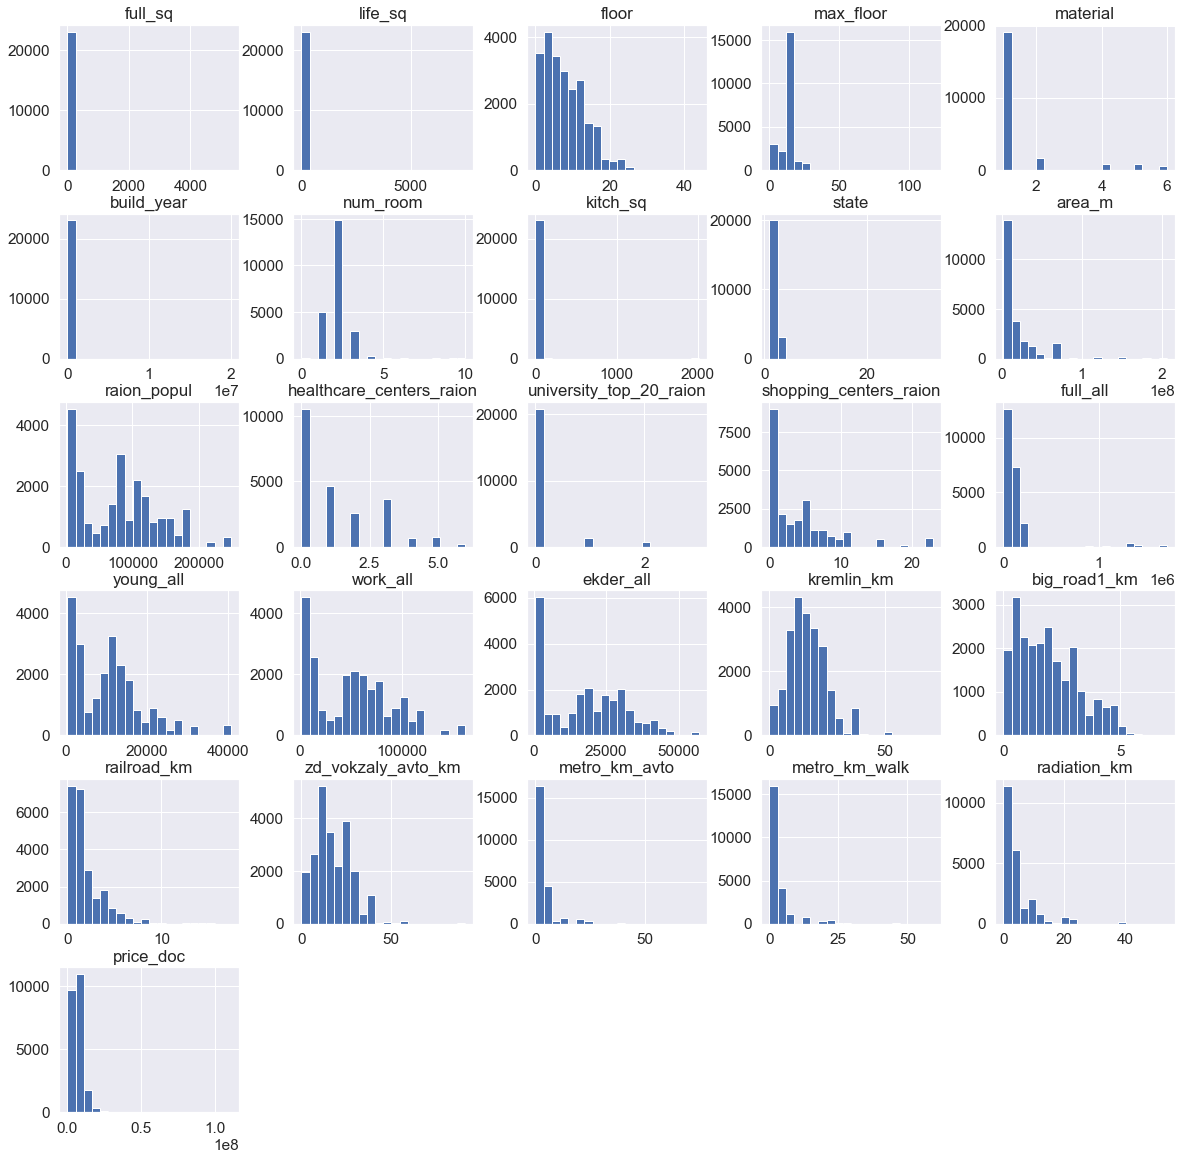

In [29]:
# Distribuição usando hist() para ver o histograma de todas as variáveis ao mesmo tempo
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
dados_num.hist(ax=ax,bins=20)
plt.show()

### <center> Conseguem notar algum histograma que chama a atenção?

Vamos olhar o histograma de `build_year`, por exemplo:

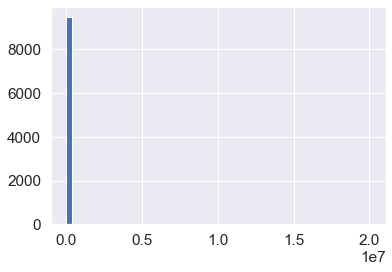

In [30]:
dados_treino.build_year.hist(bins=50)
plt.show()

Temos dados perto de zero e de mais de 2000000! Isso faz sentido sendo um ano de construção? <p>
   

Temos problemas também na variável `life_sq`:

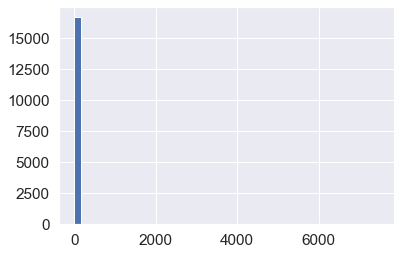

In [31]:
dados_treino.life_sq.hist(bins=50)
plt.show()

Poderíamos procurar variável a variável possíveis outliers, porém este trabalho pode ser bem demorado e também poderíamos deixar detalhes passarem. Para resolver este problema, podemos usar uma **abordagem estatística**. <p>


Assumindo que as distribuições das variáveis são **normais** ou próximo disso, poderíamos excluir todos os dados que estejam a mais de **x desvios padrões** da média.
    
<center> <img src = "../0. MISC/normal.jpeg" width=900 align=center>

Há uma função muito útil para se calcular o `z_score`, ou seja, o número de desvios padrões que um dado está distante da média

In [32]:
from scipy.stats import zscore

In [33]:
dados_num.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc
0,43,27.0,4.0,14.0,1.0,1980.0,2.0,6.0,2.0,6.407578e+06,155572,1,0,16,86206,21154,98207,36211,15.156211,1.422391,1.305159,14.231961,1.131260,1.131260,1.210027,5850000
1,34,19.0,3.0,14.0,1.0,1980.0,2.0,6.0,2.0,9.589337e+06,115352,1,0,3,76284,15727,70194,29431,8.698054,2.887377,0.694536,9.242586,0.647337,0.635053,2.724295,6000000
2,43,29.0,2.0,14.0,1.0,1980.0,2.0,6.0,2.0,4.808270e+06,101708,1,0,0,101982,13028,63388,25292,9.067885,0.647250,0.700691,9.540544,1.637996,1.445960,0.772216,5700000
3,89,50.0,9.0,14.0,1.0,1980.0,2.0,6.0,2.0,1.258354e+07,178473,1,0,11,21155,28563,120381,29529,19.487005,2.677824,1.999265,17.478380,0.984537,0.963802,6.348716,13100000
4,77,77.0,4.0,14.0,1.0,1980.0,2.0,6.0,2.0,8.398461e+06,108171,4,2,10,28179,13368,68043,26760,2.578671,1.721834,0.084113,1.595898,0.876620,0.688859,1.638318,16331452


In [81]:
z_score = zscore(dados_num)
z_score[0] # Apenas a primeira linha

array([-2.73986928e-01, -1.20669841e-01, -7.18364053e-01,  1.40291015e-01,
       -3.84626034e-01, -6.21075170e-03,  1.04100866e-01,  1.95718023e-03,
        4.95676809e-03, -5.76311980e-01,  1.30780617e+00, -1.60294120e-01,
       -3.06212444e-01,  2.47616399e+00, -1.94786276e-01,  1.27629175e+00,
        1.26038668e+00,  1.36449765e+00, -1.59566011e-01, -3.75356692e-01,
       -3.28608424e-01, -3.50485497e-01, -4.61629821e-01, -4.40435665e-01,
       -6.04757447e-01, -2.29596199e-01])

O array acima apresenta os `z_score` de todos os pontos na primeira coluna. <p>
Podemos agora definir um limiar e comparar o nosso DataFrame original com estes valores

In [35]:
teste_z_score = np.abs(z_score) < 5 # Dados a menos de 5 desvios padrões longe da média (abs=módulo)
teste_z_score

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Se quisermos manter apenas as linhas em que **todos** os dados estiverem dentro da distribuição esperada, podemos usar a função `.all()` do Pandas, que verifica se os registros de uma linha ou coluna são todos verdadeiros

In [36]:
teste_z_score.all(axis=1) 
# axis=1 significa verificar ao longo da linha, se quiséssemos ao longo da coluna seria axis=0

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
len(teste_z_score.all(axis=1))

23070

In [38]:
# Filtrando a base final 
dados_full_no_out = dados_full[teste_z_score.all(axis=1)]

Como deixamos dados 'de fora', temos que ter ideia do quanto isso representou, pois podemos ter ido muito longe na exclusão dos dados

In [39]:
# Tamanhos antes e depois de filtrar outliers
print('Tamanho antes de filtrar outliers:')
print(len(dados_full))
print('Tamanho depois de filtrar outliers ')
print(len(dados_full_no_out))

perc_nao_out = len(dados_full_no_out)/len(dados_full)*100

print('Percentual da base que mantivemos:')
print(perc_nao_out)

Tamanho antes de filtrar outliers:
23070
Tamanho depois de filtrar outliers 
22364
Percentual da base que mantivemos:
96.93974859124404


Vamos avaliar novamente os histogramas das features

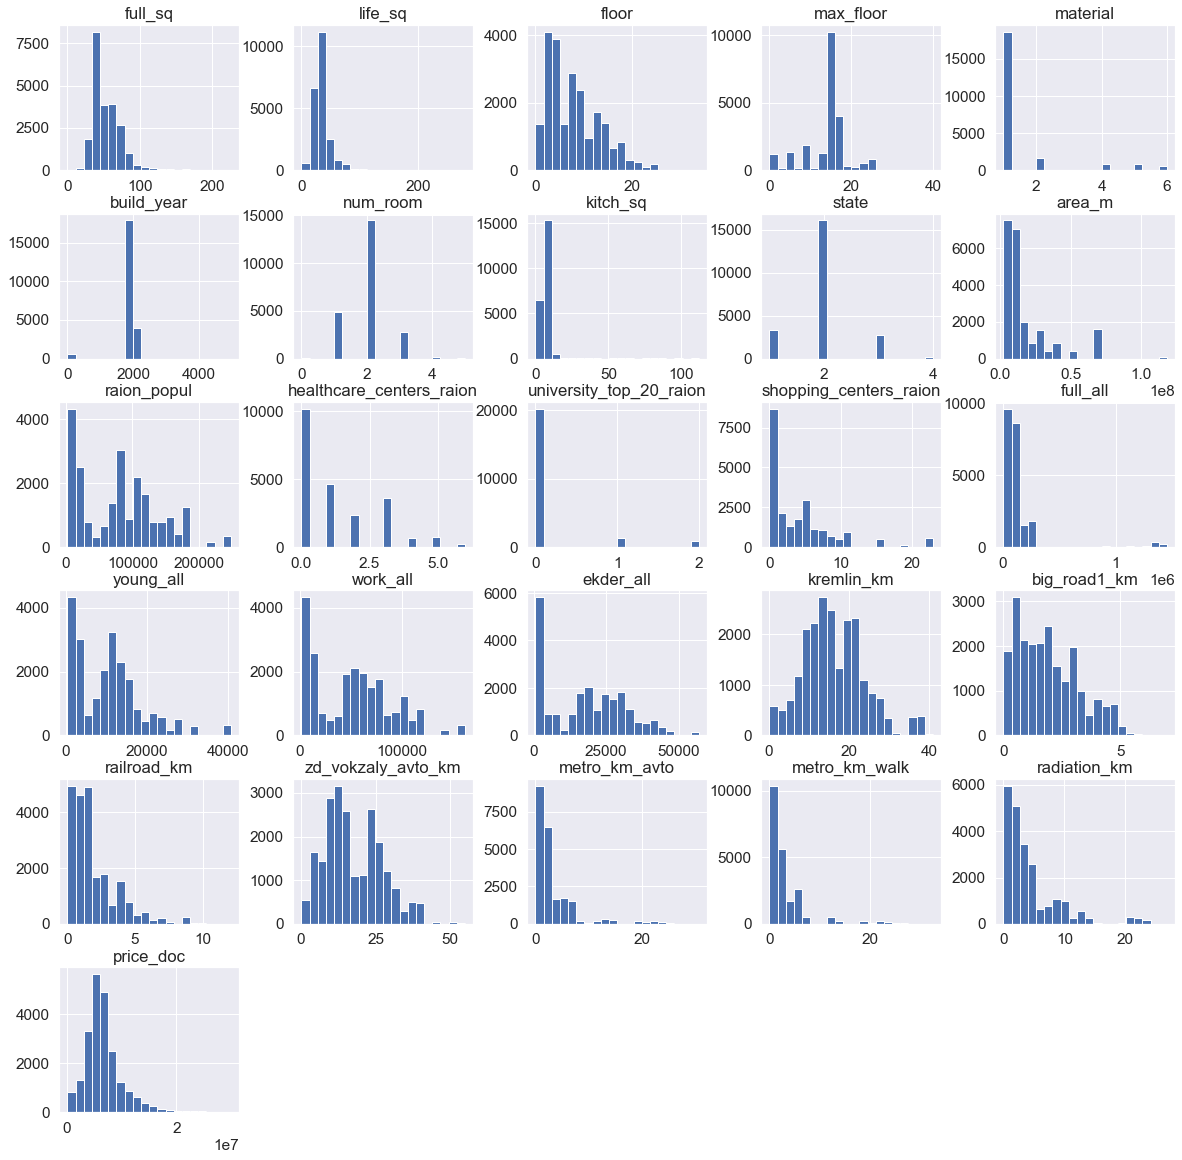

In [40]:
dados_num_no_out = dados_full_no_out.select_dtypes(exclude='object')

# Distribuição usando hist() para ver o histograma de todas as variáveis ao mesmo tempo
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
dados_num_no_out.hist(ax=ax,bins=20)
plt.show()

Vamos confirmar olhando a distribuição do `build_year`, que continua sendo problemática:

In [41]:
dados_full_no_out.build_year.describe()

count    22364.000000
mean      1931.310588
std        315.082475
min          0.000000
25%       1980.000000
50%       1980.000000
75%       1980.000000
max       4965.000000
Name: build_year, dtype: float64

Agora podemos usar um filtro manual para esta variável, já que boa parte delas já foi corrigida pelo método do `z_score`

In [42]:
ano_inicial = 1500
ano_final = 2021

# Atualizando nossa base, filtrando agora estes anos
dados_full_no_out = dados_full_no_out[
    (dados_full_no_out.build_year >= ano_inicial) & # Primeira condição
    (dados_full_no_out.build_year <= ano_final) # Segunda condição
]

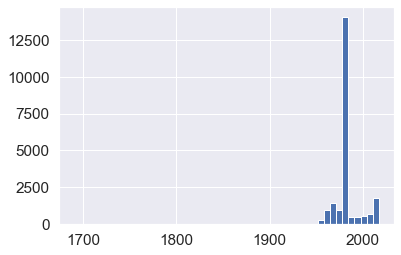

In [43]:
dados_full_no_out.build_year.hist(bins=50)
plt.show()

Não temos mais os 'zeros' poluindo a análise! Mas como deixamos dados 'de fora', temos que ter ideia do quanto isso representou, pois podemos ter ido muito longe na exclusão dos dados

In [44]:
# Tamanhos antes e depois de filtrar outliers
print('Tamanho antes de filtrar outliers '+str(len(dados_full)))
print('Tamanho depois de filtrar outliers '+str(len(dados_full_no_out)))

perc_nao_out = len(dados_full_no_out)/len(dados_full)*100

print('Percentual da base que mantivemos: {:.2f}'.format(perc_nao_out))

Tamanho antes de filtrar outliers 23070
Tamanho depois de filtrar outliers 21786
Percentual da base que mantivemos: 94.43


<a name='3.2'></a>
 ### 3.2 Tratamento de variáveis categóricas

Assim como no nosso outro problema, temos variáveis categóricas que precisam ser dummyzadas para serem usadas em modelos. <p>
Como vimos no EDA da variável `sub_area`, são muitas categorias e neste problema iremos **desconsiderá-la**.
   

In [45]:
dados_full_no_out_cat = dados_full_no_out.drop('sub_area',axis=1)

Já para as variáveis restantes, vamos aplicar o método `.get_dummies` do Pandas

In [46]:
dados_full_no_out_cat = pd.get_dummies(dados_full_no_out_cat, drop_first=True) #Excluindo variáveis dummy redundantes
dados_full_no_out_cat.head(3)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,price_doc,oil_chemistry_raion_yes,nuclear_reactor_raion_yes
0,43,27.0,4.0,14.0,1.0,1980.0,2.0,6.0,2.0,6407578.100,155572,1,0,16,86206,21154,98207,36211,15.156211,1.422391,1.305159,14.231961,1.131260,1.131260,1.210027,5850000,0,0
1,34,19.0,3.0,14.0,1.0,1980.0,2.0,6.0,2.0,9589336.912,115352,1,0,3,76284,15727,70194,29431,8.698054,2.887377,0.694536,9.242586,0.647337,0.635053,2.724295,6000000,0,0
2,43,29.0,2.0,14.0,1.0,1980.0,2.0,6.0,2.0,4808269.831,101708,1,0,0,101982,13028,63388,25292,9.067885,0.647250,0.700691,9.540544,1.637996,1.445960,0.772216,5700000,0,0


In [47]:
# Aplicando a mesma transformação nos dados de teste
dados_filtrados_teste = pd.get_dummies(dados_filtrados_teste.drop('sub_area',axis=1),drop_first=True)

 <a name='1'></a>
 ## 4. Modelagem

Com os dados analisados e processados, agora podemos atacar o problema de fato e prever os preços das casas!

<a name='4.0'></a>
 ### 4.0 Separando os dados

Como fizemos no último problema, vamos separar as features da variável resposta, pois quase todos os modelos em python exigem os dados assim:

In [48]:
# Separando os dados em features e variável resposta
# Dados de treino
X_train = dados_full_no_out_cat.drop(['price_doc'],axis=1) # Axis=1 significa procurar dentre as colunas este nome 'price_doc'
y_train = dados_full_no_out_cat.price_doc # Nossa variável resposta

# Excluindo as colunas 'id','timestamp' e 'sub_area' nos dados de teste, e aplicando .get

# Dados de teste -> Estamos usando o 'dados_filtrados_teste' pois não tivemos que fazer nenhum preprocessamento sobre esta base
X_test = dados_filtrados_teste.drop(['price_doc'],axis=1) # Axis=1 significa procurar dentre as colunas este nome 'price_doc'
y_test = dados_filtrados_teste.price_doc # Nossa variável resposta

In [49]:
X_test.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,oil_chemistry_raion_yes,nuclear_reactor_raion_yes
0,45,30.0,3.0,5.0,1.0,1964.0,2.0,5.0,2.0,7.984444e+06,142243,1,0,5,31167,16405,93811,32027,10.179723,0.969475,0.545758,12.565750,1.604994,1.252561,0.854461,0,0
1,73,44.0,4.0,17.0,1.0,1985.0,3.0,10.0,3.0,1.216448e+07,78507,2,0,6,67710,10175,48620,19712,12.931756,1.762984,2.541533,13.619835,0.165161,0.165161,1.618572,0,0
2,55,35.0,4.0,5.0,2.0,1961.0,3.0,5.0,2.0,5.235177e+07,142462,0,0,3,78507,19784,85551,37127,13.255681,1.636755,1.300914,13.674179,1.553650,1.553650,1.402411,0,0
3,47,30.0,3.0,9.0,1.0,1978.0,2.0,6.0,3.0,1.428699e+07,157010,3,0,5,12327,16831,98260,41919,14.504257,1.073767,2.182843,12.441154,2.500266,2.500266,2.310450,0,0
4,47,28.0,2.0,12.0,1.0,1974.0,2.0,6.0,2.0,1.005305e+07,175518,1,0,9,61396,21400,112133,41985,12.445773,2.029489,0.969733,10.394751,1.500997,1.418041,1.556124,0,0


<a name='4.1'></a>
 ### 4.1 Escolha da métrica

Vocês terão uma aula propria só para isso, mas para aproveitarmos o momento, vamos falar rapidamente de algumas métricas:
    
* `mean_squared_error` ou MSE: Média das diferenças entre a variável verdadeira e a predita **ao quadrado**. Quanto menor, melhor!
<img src = "../0. MISC/mse.gif" width=300>
* `root_mean_squared_error` ou RMSE: Raíz quadrada do `mean_squared_error`. Quanto menor, melhor!
<img src = "../0. MISC/rmse.png" width=300>
* `r2_score` ou apenas r2: Percentual da variância total da variável resposta que pode ser explicada pelo modelo **além do que a média já explica**. Quanto maior, melhor! <p>
<img src = "../0. MISC/r2score.png" width=400> 

Para este problema, vamos usar o `r2_score`, para comparar com o problema anterior onde usamos o `mean_squared_error`

O `r2_score` é uma forma simples de compararmos nosso modelo com o que teríamos se assumíssimos a mesma **média simples** como previsão de todos os pontos. <p>
Se o r2 for igual a **0.0**, isso quer dizer que nosso modelo é tão bom quanto uma média, o que é <font color=red> **ruim**. </font> <p>
Se o r2 for próximo de **1.0**, significa que estamos explicando quase toda a variação dos dados pelo nosso modelo, o que é <font color=green> **ótimo** </font>!

In [50]:
# Importando a função que calcula r2_score
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
# Testando o conceito do r2_score
media_treino = np.ones_like(y_train)*y_train.mean()

print('R2 score sobre os dados de treino, prevendo a média para todos')
print(r2_score(y_train,media_treino))

R2 score sobre os dados de treino, prevendo a média para todos
0.0


<a name='4.2'></a>
 ### 4.2 Treinamento e avaliação do modelo

Novamente vamos treinar nossos modelos usando o `LinearRegression` do `scikit-learn`, então começamos importando o módulo

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# Vamos começar humildes, treinando o modelo com as features que já temos

modelo = LinearRegression()
#modelo = DecisionTreeRegressor(max_depth=10)
modelo.fit(X_train,y_train)
#modelo.fit(X_train,y_train)

LinearRegression()

Agora que temos o modelo treinado, podemos prever os resultados dos preços nas bases de treino e teste usando o `.predict()`

In [54]:
# Previsão dos preços dos dados de treino
y_pred_treino = modelo.predict(X_train)
# Previsão dos preços dos dados de teste
y_pred_teste = modelo.predict(X_test)

E os valores dos coeficientes, como ficaram?

<AxesSubplot:>

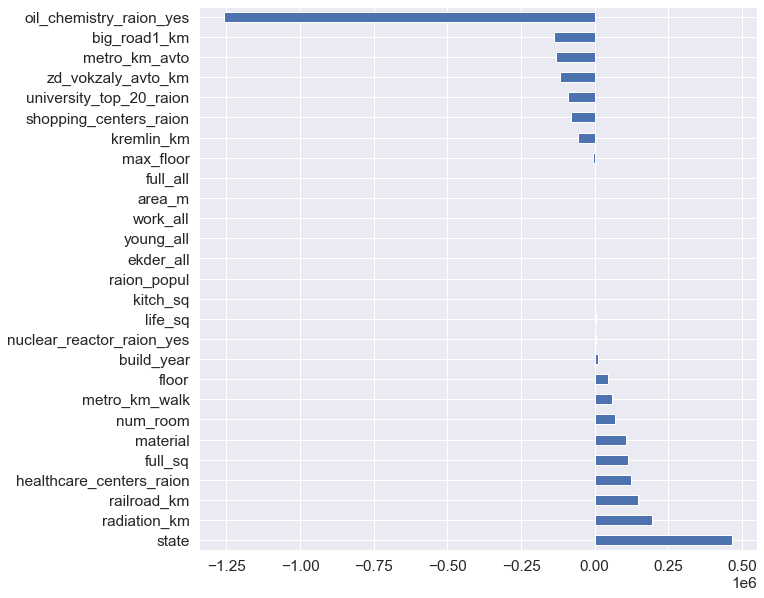

In [55]:
coefs = pd.Series(modelo.coef_,index=X_train.columns)
plt.figure(figsize=(10,10))
coefs.sort_values(ascending=False).plot(kind='barh')


Vamos agora avaliar a métrica deste primeiro modelo

In [56]:
# Métrica r2 do treino 
r2_treino = r2_score(y_train,y_pred_treino)
# Métrica r2 do teste
r2_teste = r2_score(y_test,y_pred_teste)

print('R2 nos dados de treino: {:.3f}'.format(r2_treino))
print('R2 nos dados de teste: {:.3f}'.format(r2_teste))

R2 nos dados de treino: 0.516
R2 nos dados de teste: 0.443


A interpretação prática deste valor de R2 nos diz que o modelo linear está conseguindo prever **cerca de 50%** da variância total dos dados **após descontarmos a média de todos os dados**

<a name='4.3'></a>
 ### 4.3 Feature Engineering

Pelos coeficientes nas features a partir do modelo de base, será que podemos construir mais features para ajudar no nosso problema? <p>
    
Assim como no problema dos vinhos, vamos construir uma função que facilite a apuração da métrica na medida em que enriquecermos mais nossa base de features

In [57]:
# Copiando os dados para facilitar o rastreio
X_train_feat = X_train.copy()
X_test_feat = X_test.copy()

In [58]:
def treina_modelo_linear(X_treino, X_teste):
    # Treina modelo nos dados de treino
    modelo = LinearRegression()
    modelo.fit(X_treino,y_train)
    # Predict nos dados de treino e teste
    y_p_train = modelo.predict(X_treino)
    y_p_test = modelo.predict(X_teste)
    # Calcula a métrica (RMSE)
    r2_train = r2_score(y_train,y_p_train)
    r2_test = r2_score(y_test,y_p_test)
    # Retorna em forma de tupla as métricas finais no treino e no teste
    return ('Treino: {:.3f}'.format(r2_train), 'Teste: {:.3f}'.format(r2_test))

In [59]:
treina_modelo_linear(X_train,X_test)

('Treino: 0.516', 'Teste: 0.443')

Quais features podemos construir a partir das que já temos?

In [60]:
# Construção de features - Dados de treino

# Densidade populacional do distrito/raion
X_train_feat['densidade_pop'] = X_train_feat['raion_popul']/X_train_feat['area_m']
# Fração da população do distrito composta por idosos
X_train_feat['fracao_idosos'] = X_train_feat['ekder_all']/X_train_feat['raion_popul']
# Fração da população do distrito composta por trabalhadores
X_train_feat['fracao_trab'] = X_train_feat['work_all']/X_train_feat['raion_popul']


In [61]:
# Construção de features - Dados de teste

# Densidade populacional do distrito/raion
X_test_feat['densidade_pop'] = X_test_feat['raion_popul']/X_test_feat['area_m']
# Fração da população do distrito composta por idosos
X_test_feat['fracao_idosos'] = X_test_feat['ekder_all']/X_test_feat['raion_popul']
# Fração da população do distrito composta por trabalhadores
X_test_feat['fracao_trab'] = X_test_feat['work_all']/X_test_feat['raion_popul']


In [62]:
X_train_feat.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,healthcare_centers_raion,university_top_20_raion,shopping_centers_raion,full_all,young_all,work_all,ekder_all,kremlin_km,big_road1_km,railroad_km,zd_vokzaly_avto_km,metro_km_avto,metro_km_walk,radiation_km,oil_chemistry_raion_yes,nuclear_reactor_raion_yes,densidade_pop,fracao_idosos,fracao_trab
0,43,27.0,4.0,14.0,1.0,1980.0,2.0,6.0,2.0,6.407578e+06,155572,1,0,16,86206,21154,98207,36211,15.156211,1.422391,1.305159,14.231961,1.131260,1.131260,1.210027,0,0,0.024279,0.232760,0.631264
1,34,19.0,3.0,14.0,1.0,1980.0,2.0,6.0,2.0,9.589337e+06,115352,1,0,3,76284,15727,70194,29431,8.698054,2.887377,0.694536,9.242586,0.647337,0.635053,2.724295,0,0,0.012029,0.255141,0.608520
2,43,29.0,2.0,14.0,1.0,1980.0,2.0,6.0,2.0,4.808270e+06,101708,1,0,0,101982,13028,63388,25292,9.067885,0.647250,0.700691,9.540544,1.637996,1.445960,0.772216,0,0,0.021153,0.248673,0.623235
3,89,50.0,9.0,14.0,1.0,1980.0,2.0,6.0,2.0,1.258354e+07,178473,1,0,11,21155,28563,120381,29529,19.487005,2.677824,1.999265,17.478380,0.984537,0.963802,6.348716,0,0,0.014183,0.165454,0.674505
4,77,77.0,4.0,14.0,1.0,1980.0,2.0,6.0,2.0,8.398461e+06,108171,4,2,10,28179,13368,68043,26760,2.578671,1.721834,0.084113,1.595898,0.876620,0.688859,1.638318,0,0,0.012880,0.247386,0.629032


Vamos testar agora o modelo com as features construídas:

In [63]:
print('Modelo linear inicial:')
print(treina_modelo_linear(X_train,X_test))
print('Modelo linear + features relativas:')
print(treina_modelo_linear(X_train_feat,X_test_feat))

Modelo linear inicial:
('Treino: 0.516', 'Teste: 0.443')
Modelo linear + features relativas:
('Treino: 0.517', 'Teste: 0.446')


Vamos usar novamente  o `PolynomialFeatures` para construir múltiplas features de ordem superior

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pf = PolynomialFeatures(degree=2) # Até polinômios do terceiro grau
pf.fit(X_train_feat)
X_train_feat_poly = pf.transform(X_train_feat)
# Aplicando a mesma transformação sobre os dados de teste
X_test_feat_poly = pf.transform(X_test_feat)

In [66]:
print('Modelo linear inicial:')
print(treina_modelo_linear(X_train,X_test))
print('Modelo linear + features relativas:')
print(treina_modelo_linear(X_train_feat,X_test_feat))
print('Modelo linear + features relativas + features polinomiais até o 2º grau:')
print(treina_modelo_linear(X_train_feat_poly,X_test_feat_poly))

Modelo linear inicial:
('Treino: 0.516', 'Teste: 0.443')
Modelo linear + features relativas:
('Treino: 0.517', 'Teste: 0.446')
Modelo linear + features relativas + features polinomiais até o 2º grau:
('Treino: 0.596', 'Teste: 0.489')


Esse último ajuste **melhorou** a performance no conjunto de treino, mas melhorou **menos** no conjunto de teste! <p>
O que significa este efeito?

Este efeito é conhecido como **superajuste** ou **overfitting**, quando nosso modelo prestou atenção demais nos dados de treino, sendo ruim para generalizações (que é a razão pela qual construímos os modelos

<center> <img src = "../0. MISC/degree.png" width=1500>

 <a name='5'></a>
 ## 5. Conclusões

<a name='5.1'></a>
 ### 5.1 Resumo do que fizemos

Vamos recapitular o que fizemos, pois já é um projeto bem similar ao que encontramos no dia a dia de um cientista:
    
* Entendemos os dados à disposição, seus formatos e tipos, separando em **categóricos** e **numéricos**
* Analisamos o comportamento dos dados, tanto em relação à variável resposta quanto possíveis correlações
* Tratamos os dados faltantes, fazendo um preenchimento inteligente por feature
* Tratamos os outliers, excluindo registros com dados irreais ou corrompidos
* Definimos uma métrica de avaliação e testamos vários modelos lineares, melhorando a performance via Engenharia de Variáveis


<a name='5.2'></a>
 ### 5.2 O que poderíamos explorar ou melhorar mais?

Em uma situação como essa, em que exploramos ao máximo a **Regressão Linear**, temos dois caminhos potenciais:

* Buscar mais dados 
* Usar modelos mais robustos

Para testar mais modelos, vamos generalizar a função que treina modelos:

In [67]:
def treina_modelo(X_treino, X_teste, tipo_modelo):
    # Treina modelo nos dados de treino
    modelo = tipo_modelo
    modelo.fit(X_treino,y_train)
    # Predict nos dados de treino e teste
    y_p_train = modelo.predict(X_treino)
    y_p_test = modelo.predict(X_teste)
    # Calcula a métrica (RMSE)
    r2_train = r2_score(y_train,y_p_train)
    r2_test = r2_score(y_test,y_p_test)
    # Retorna em forma de tupla as métricas finais no treino e no teste
    return ('Treino: {:.3f}'.format(r2_train), 'Teste: {:.3f}'.format(r2_test))

In [68]:
# Importando alguns modelos diferentes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [69]:
print('Modelo de árvore de decisão:')
print(treina_modelo(X_train_feat,X_test_feat, DecisionTreeRegressor(max_depth=5)))
print('Modelo de Random Forest:')
print(treina_modelo(X_train_feat,X_test_feat, RandomForestRegressor(n_estimators=50)))
print('Modelo de Gradient Boosting:')
print(treina_modelo(X_train_feat,X_test_feat, GradientBoostingRegressor(n_estimators=100)))

Modelo de árvore de decisão:
('Treino: 0.552', 'Teste: 0.430')
Modelo de Random Forest:
('Treino: 0.946', 'Teste: 0.722')
Modelo de Gradient Boosting:
('Treino: 0.652', 'Teste: 0.530')


<a name='5.3'></a>
 ### 5.3 Como usar este notebook para seu projeto?

Acima de tudo, modelagem é um processo de **escolhas**, que se bem justificadas podem nos guiar para os melhores modelos e resultados. <p>
Experimente trocar as técnicas, os dados de entradas e os preprocessamentos para verificar se as performances melhoram!

<center> <img src = "../0. MISC/dmitri.gif" width=500>

### <center> Parabéns por ter concluído mais este desafio!